<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Exploring_US_Home_Target_Return_Drivers_with_PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA

import requests
from google.colab import userdata
fred_key = userdata.get('fred')

In [ ]:
URL_BASE = 'https://api.stlouisfed.org/'
ENDPOINT = 'fred/series/observations'

URL = URL_BASE + ENDPOINT

API_KEY = fred_key
INDICATOR = 'USSTHPI'

params = {
    'api_key': API_KEY,
    'series_id': INDICATOR,
    'file_type': 'json'
}

res = requests.get(URL, params=params)
data = res.json()
df = pd.DataFrame(data['observations'])
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

df['date'] = pd.to_datetime(df['date'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df = df.set_index('date')
df.rename(columns={'value': 'home_price'}, inplace=True)
df.dropna(inplace=True)
df.head()

,home_price
date,
1975-01-01,59.94
1975-04-01,60.86
1975-07-01,61.27
1975-10-01,62.24
1976-01-01,62.77


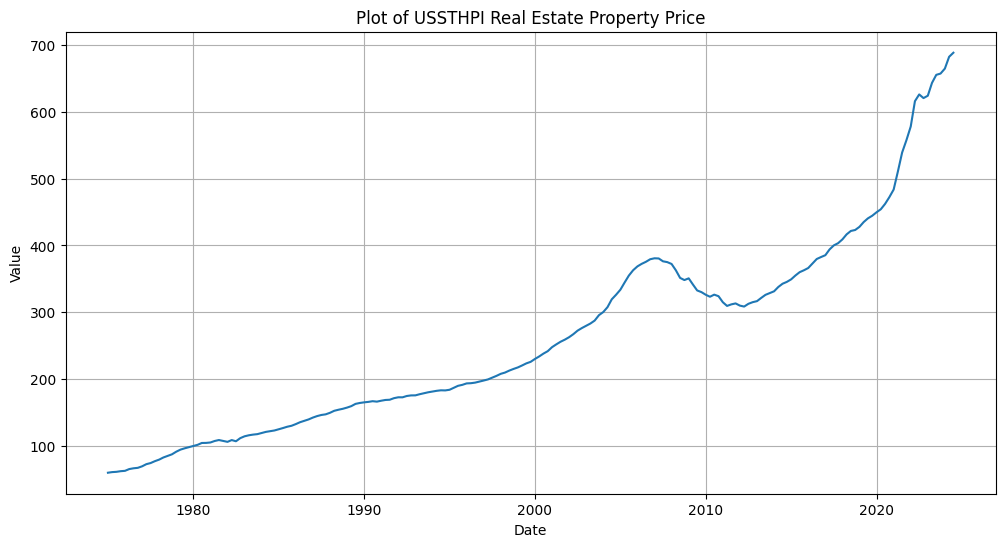

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['home_price'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Plot of {INDICATOR} Real Estate Property Price')
plt.grid(True)
plt.show()

In [ ]:
lags = [1,6,12,24,48,120]
for lag in lags:
  df[f'return_{lag}m'] = (
      df['home_price']
      .pct_change(lag)
      )

targets = [1,6,12,24,48,120]
for t in targets:
  df[f'target_{t}m'] = (
      df[f'return_{t}m']
      .shift(-t)
  )

In [ ]:
df

,home_price,return_1m,return_6m,return_12m,return_24m,return_48m,return_120m,target_1m,target_6m,target_12m,target_24m,target_48m,target_120m
date,,,,,,,,,,,,,
1975-01-01,59.94,NaN,NaN,NaN,NaN,NaN,NaN,0.015349,0.110444,0.327494,0.755088,1.376877,4.568235
1975-04-01,60.86,0.015349,NaN,NaN,NaN,NaN,NaN,0.006737,0.105159,0.359842,0.765035,1.377259,4.660039
1975-07-01,61.27,0.006737,NaN,NaN,NaN,NaN,NaN,0.015832,0.134650,0.390403,0.776726,1.388608,4.792721
1975-10-01,62.24,0.015832,NaN,NaN,NaN,NaN,NaN,0.008515,0.168541,0.405366,0.727185,1.366645,4.831459
1976-01-01,62.77,0.008515,NaN,NaN,NaN,NaN,NaN,0.042058,0.185120,0.456269,0.690935,1.383304,4.873825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,655.30,0.018638,0.133737,0.417907,0.637841,1.101331,2.664374,0.002991,NaN,NaN,NaN,NaN,NaN
2023-10-01,657.26,0.002991,0.067102,0.391586,0.629220,1.097995,2.645369,0.011274,NaN,NaN,NaN,NaN,NaN
2024-01-01,664.67,0.011274,0.061773,0.374080,0.624752,1.144166,2.663507,0.026570,NaN,NaN,NaN,NaN,NaN


In [ ]:
returns = df[['target_1m','target_6m','target_12m','target_24m','target_48m','target_120m']]
returns.dropna(inplace=True)
returns.head()

<ipython-input-7-13c901d936ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns.dropna(inplace=True)


,target_1m,target_6m,target_12m,target_24m,target_48m,target_120m
date,,,,,,
1975-01-01,0.015349,0.110444,0.327494,0.755088,1.376877,4.568235
1975-04-01,0.006737,0.105159,0.359842,0.765035,1.377259,4.660039
1975-07-01,0.015832,0.134650,0.390403,0.776726,1.388608,4.792721
1975-10-01,0.008515,0.168541,0.405366,0.727185,1.366645,4.831459
1976-01-01,0.042058,0.185120,0.456269,0.690935,1.383304,4.873825


In [ ]:
pca = PCA(n_components=3)
pca.fit(returns)

pct = pca.explained_variance_ratio_
pca_components = pca.components_

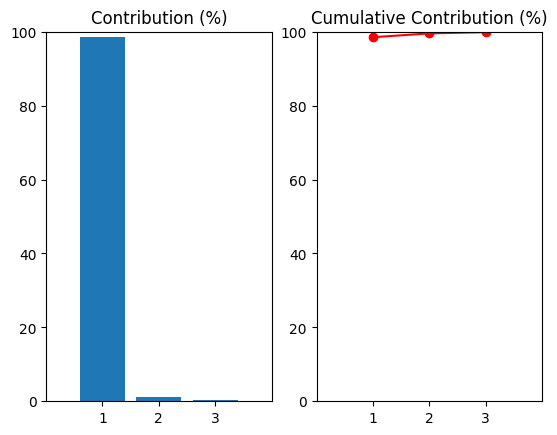

In [ ]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct) + 1, 1)
plt.subplot(1,2,1)
plt.bar(x, pct * 100, align='center')
plt.title('Contribution (%)')
plt.xticks(x)
plt.xlim([0,4])
plt.ylim([0,100])
plt.subplot(1,2,2)
plt.plot(x, cum_pct * 100, color='r', marker='o', linestyle='-')
plt.title('Cumulative Contribution (%)')
plt.xticks(x)
plt.xlim([0,4])
plt.ylim([0,100])
plt.show()

In [ ]:
X = np.asarray(returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(data=factor_returns,
                              columns=['f1','f2','f3'],
                              index=returns.index)
factor_returns.head()

,f1,f2,f3
date,,,
1975-01-01,4.836588,-0.044178,0.240844
1975-04-01,4.928261,-0.028886,0.220493
1975-07-01,5.063199,-0.010458,0.188522
1975-10-01,5.090753,-0.026888,0.124368
1976-01-01,5.135928,-0.029160,0.089186


In [ ]:
factor_exposure = pd.DataFrame(
    index=['f1','f2','f3'],
    columns=returns.columns,
    data=pca_components
).T

factor_exposure.head()

,f1,f2,f3
target_1m,0.004708,0.039567,-0.065235
target_6m,0.039476,0.255971,-0.294753
target_12m,0.090154,0.539476,-0.212756
target_24m,0.132674,0.735021,0.538116
target_48m,0.249774,-0.307674,0.721543


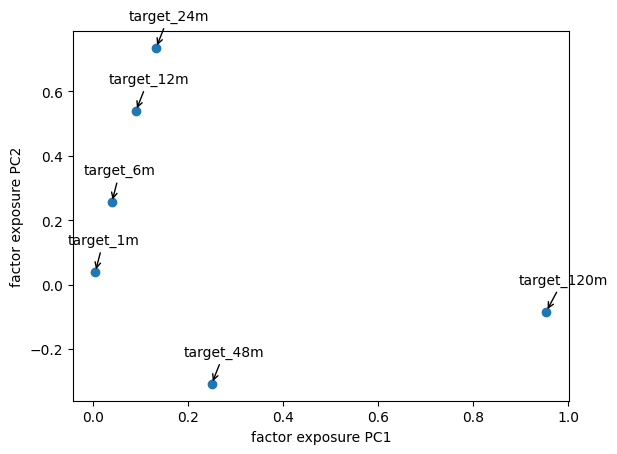

In [ ]:
labels = factor_exposure.index
data = factor_exposure.values
plt.scatter(data[:,0], data[:,1])
plt.xlabel('factor exposure PC1')
plt.ylabel('factor exposure PC2')
for label, x, y, in zip(labels, data[:,0], data[:,1]):
    plt.annotate(label, xy=(x,y),
                 xytext=(-20,20),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->',
                                 connectionstyle='arc3,rad=0'))
plt.show()

#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi